In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../shift-detector'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import shift_detector
from shift_detector.detector import Detector
from shift_detector.checks.dq_metrics_check import DQMetricsCheck
from shift_detector.checks.distinction_check import DistinctionCheck
from shift_detector.checks.sorensen_dice_check import SorensenDiceCheck
from shift_detector.checks.conditional_probabilities_check import ConditionalProbabilitiesCheck
from shift_detector.checks.embedding_distance_check import EmbeddingDistanceCheck
from shift_detector.checks.word_prediction_check import WordPredictionCheck
from shift_detector.checks.statistical_checks.numerical_statistical_check import NumericalStatisticalCheck
from shift_detector.checks.statistical_checks.categorical_statistical_check import CategoricalStatisticalCheck
from shift_detector.checks.statistical_checks.text_metadata_statistical_check import TextMetadataStatisticalCheck
from shift_detector.checks.lda_check import LdaCheck

2019-07-02 13:12:44,169 [INFO]  'pattern' package found; tag filters are available for English
Using TensorFlow backend.
W0702 13:12:45.296562 140736745337792 deprecation_wrapper.py:119] From /Users/zeinertj/shift-detector/shift_detector/precalculations/word_prediction_precalculation.py:12: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [3]:
import pandas as pd
'''
df1 = './../train_ascii.csv'
df1 = pd.read_csv(df1, delimiter=';').sample(100)
df2 = './../audits_ascii.csv'
df2 = pd.read_csv(df2, delimiter=';')
'''

df = pd.read_csv('./data/pokedex.csv')
df1 = df.head(300)
df2 = df.tail(721-300)
'''
sales1 = {'brand': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,
         'payment2': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,
         'description': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}

sales2 = {'brand': ["Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [10, 5, 150, 200, 50, 10, 5, 1] * 10,
         'payment2': [15, 2, 5, 0, 5, 3, 200, 50] * 10,
         'description': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}

df1 = pd.DataFrame.from_dict(sales1)
df2 = pd.DataFrame.from_dict(sales2)
'''

'\nsales1 = {\'brand\': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",\n                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",\n                   "Jones LLC"] * 10,\n         \'payment\': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,\n         \'payment2\': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,\n         \'description\': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}\n\nsales2 = {\'brand\': ["Blue Inc", "Alpha Co",\n                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",\n                   "Jones LLC"] * 10,\n         \'payment\': [10, 5, 150, 200, 50, 10, 5, 1] * 10,\n         \'payment2\': [15, 2, 5, 0, 5, 3, 200, 50] * 10,\n         \'description\': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}\n\ndf1 = pd.DataFrame.from_dict(sales1)\ndf2 = pd.DataFrame.from_dict(sales2)\n'

In [4]:
df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Entry
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur can be seen napping in bright sunlig...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,There is a bud on this Pokémon’s back. To supp...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,There is a large flower on Venusaur’s back. Th...
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,The flame that burns at the tip of its tail is...
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Charmeleon mercilessly destroys its foes using...
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Charizard flies around the sky in search of po...
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Squirtle’s shell is not merely used for protec...
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,"Its tail is large and covered with a rich, thi..."
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Blastoise has water spouts that protrude from ...
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Perhaps because it would like to grow up\nquic...


In [5]:
df2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Entry
300,301,Delcatty,Normal,NaN,380,70,65,65,55,55,70,3,False,Delcatty sleeps anywhere it wants without keep...
301,302,Sableye,Dark,Ghost,380,50,75,75,65,65,50,3,False,It digs through the ground with its hard claws...
302,303,Mawile,Steel,Fairy,380,50,85,85,55,55,50,3,False,"A cunning and terrifying Pokémon, its cuteness..."
303,304,Aron,Steel,Rock,330,50,70,100,40,40,30,3,False,Aron has a body of steel. With one all-out cha...
304,305,Lairon,Steel,Rock,430,60,90,140,50,50,40,3,False,Lairon feeds on iron contained in rocks and wa...
305,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False,Aggron is protective of its environment. If it...
306,307,Meditite,Fighting,Psychic,280,30,40,55,40,55,60,3,False,Meditite heightens its inner energy through me...
307,308,Medicham,Fighting,Psychic,410,60,60,75,60,75,80,3,False,"Through the power of meditation, Medicham deve..."
308,309,Electrike,Electric,NaN,295,40,45,40,65,40,65,3,False,Friction between the air and its fur produces\...
309,310,Manectric,Electric,NaN,475,70,75,60,105,60,105,3,False,Manectric can be found beneath unnatural\nthun...


In [6]:
from shift_detector.utils.column_management import ColumnType
custom_column_types = {
    'Legendary': ColumnType.categorical,
    'Type 1': ColumnType.categorical,
    'Type 2': ColumnType.categorical,
    'Generation': ColumnType.categorical
}
detector = Detector(df1, df2, **custom_column_types)

Numerical columns: Speed, Total, Sp. Def, Defense, HP, #, Attack, Sp. Atk
Categorical columns: Legendary, Type 1, Generation, Type 2
Text columns: Entry, Name
Used columns: #, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, Entry


In [7]:
sc = DQMetricsCheck()
dc = DistinctionCheck(num_epochs=10, relative_threshold=0.2)
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.01, rule_limit=10,
                                               min_delta_supports=0.01, min_delta_confidences=0.01)
sdc = SorensenDiceCheck(n=1)
edc = EmbeddingDistanceCheck()
# wpc = WordPredictionCheck()
nsc = NumericalStatisticalCheck()
csc = CategoricalStatisticalCheck()
tmc = TextMetadataStatisticalCheck()
# lc = LdaCheck()

In [8]:
import logging

detector.run(sc, sdc, edc, nsc, csc, tmc)

Executing DQMetricsCheck
- Executing DQMetricsPrecalculation
- Finished Precalculation
Executing SorensenDiceCheck
- Executing SorensenDicePrecalculations
- Executing NGram
- Finished Precalculation
- Finished Precalculation
Executing EmbeddingDistanceCheck
- Executing EmbeddingDistancePrecalculation
- Executing TextEmbeddingPrecalculation
- Executing TokenizeIntoLowerWordsPrecalculation
- Finished Precalculation
- Finished Precalculation
- Finished Precalculation
Executing NumericalStatisticalCheck
Executing CategoricalStatisticalCheck
- Executing LowCardinalityPrecalculation
- Finished Precalculation
Executing TextMetadataStatisticalCheck
- Executing TextMetadata
- Executing NumCharsMetadata
- Finished Precalculation
- Executing NumWordsMetadata
- Use already executed TokenizeIntoLowerWordsPrecalculation
- Finished Precalculation
- Executing DistinctWordsRatioMetadata
- Use already executed TokenizeIntoLowerWordsPrecalculation
- Finished Precalculation
- Finished Precalculation


# OVERVIEW

Executed 6 checks


,Column,# Shifts detected,# Checks Executed
0,Generation,2,2
1,Type 2,2,2
2,Total,2,2
3,Type 1,2,2
4,Legendary,2,2
5,HP,2,2
6,#,2,2
7,Attack,2,2
8,Entry,2,3
9,Speed,1,2


# DETAILS

## DQ Metrics Check

Examined Columns: ['Speed', 'Generation', 'Type 2', 'Total', 'Sp. Def', 'Type 1', 'Defense', 'Legendary', 'HP', '#', 'Attack', 'Sp. Atk']
Shifted Columns: ['Speed', 'Generation', 'Type 2', 'Total', 'Sp. Def', 'Type 1', 'Defense', 'Legendary', 'HP', '#', 'Attack', 'Sp. Atk']



### Numerical columns

Column 'Speed':
Metric: num_distinct, Diff: +88.24 %, threshold: +20.0 %


Column 'Total':
Metric: num_distinct, Diff: +47.06 %, threshold: +20.0 %


Column 'Sp. Def':
Metric: num_distinct, Diff: +80.85 %, threshold: +20.0 %


Column 'Defense':
Metric: num_distinct, Diff: +46.67 %, threshold: +20.0 %


Column '#':
Metric: mean, Diff: +239.53 %, threshold: +15.0 %
Metric: median, Diff: +239.53 %, threshold: +15.0 %
Metric: quartile_1, Diff: +435.97 %, threshold: +20.0 %
Metric: quartile_3, Diff: +173.47 %, threshold: +20.0 %
Metric: num_distinct, Diff: +40.33 %, threshold: +20.0 %
Metric: std, Diff: +40.27 %, threshold: +25.0 %


Column 'HP':
Metric: quartile_1, Diff: +20.22 %, threshold: +20.0 %
Metric: num_distinct, Diff: +43.64 %, threshold: +20.0 %


Column 'Attack':
Metric: num_distinct, Diff: +72.22 %, threshold: +20.0 %


Column 'Sp. Atk':
Metric: quartile_1, Diff: +25.0 %, threshold: +20.0 %
Metric: num_distinct, Diff: +79.59 %, threshold: +20.0 %




### Categorical columns

Column 'Generation':
Attribute: '1' with Diff: +50.33 %, categorical threshold: +/- 5.0 %
Attribute: '2' with Diff: +33.33 %, categorical threshold: +/- 5.0 %


Column 'Legendary':
Attribute: 'False' with Diff: +5.79 %, categorical threshold: +/- 5.0 %


Column 'Type 1':
Attribute: 'Water' with Diff: +5.89 %, categorical threshold: +/- 5.0 %
Attribute: 'Normal' with Diff: +5.88 %, categorical threshold: +/- 5.0 %


Column 'Type 2':
Attribute: 'Flying' with Diff: +5.02 %, categorical threshold: +/- 5.0 %
Attribute: 'Poison' with Diff: +5.77 %, categorical threshold: +/- 5.0 %





/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


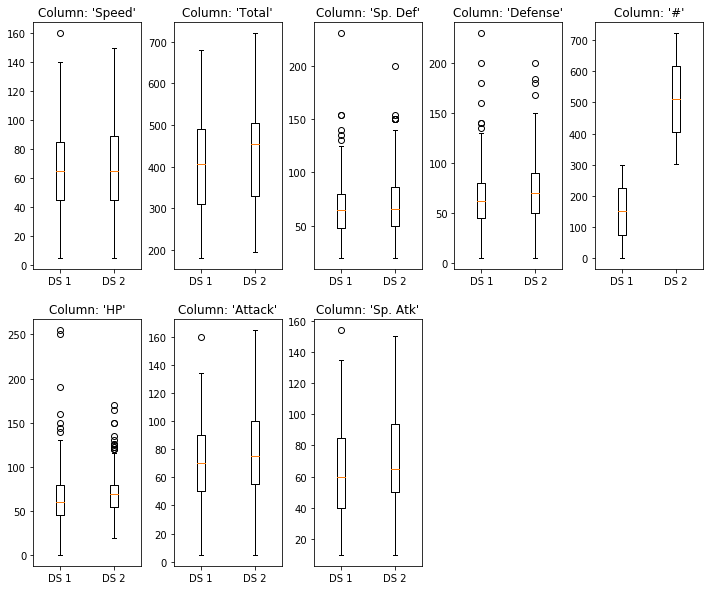

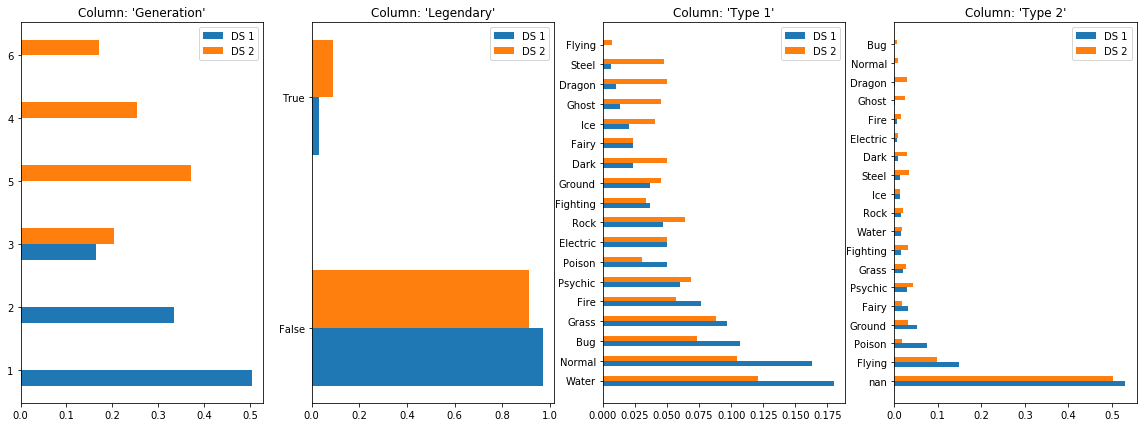

## Sorensen Dice Check

Examined Columns: ['Entry', 'Name']
Shifted Columns: []




,Similarity within Dataset 1,Similarity within Dataset 2,Similarity between Datasets,Threshold


## Embedding Distance Check

Examined Columns: ['Entry', 'Name']
Shifted Columns: ['Entry']




,Distance within Dataset 1,Distance within Dataset 2,Distance between Datasets,Rel. Threshold
Entry,10.440324,2.464695,16.950013,3.0


## Numerical Statistical Check

Examined Columns: ['#', 'Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
Shifted Columns: ['#', 'Attack', 'HP', 'Total']

Performed statistical test: Kolmogorov-Smirnov-Two-Sample-Test
Significance level: 0.01

Column '#':
	p = 1.5238206630829248e-155

Column 'Attack':
	p = 0.007996132866212915

Column 'HP':
	p = 0.002067704467785591

Column 'Total':
	p = 0.0002175056328304017


p-values of all columns:


,Speed,Total,Sp. Def,Defense,HP,#,Attack,Sp. Atk
pvalue,0.859003,0.000218,0.085695,0.03047,0.002068,1.523821e-155,0.007996,0.053566


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


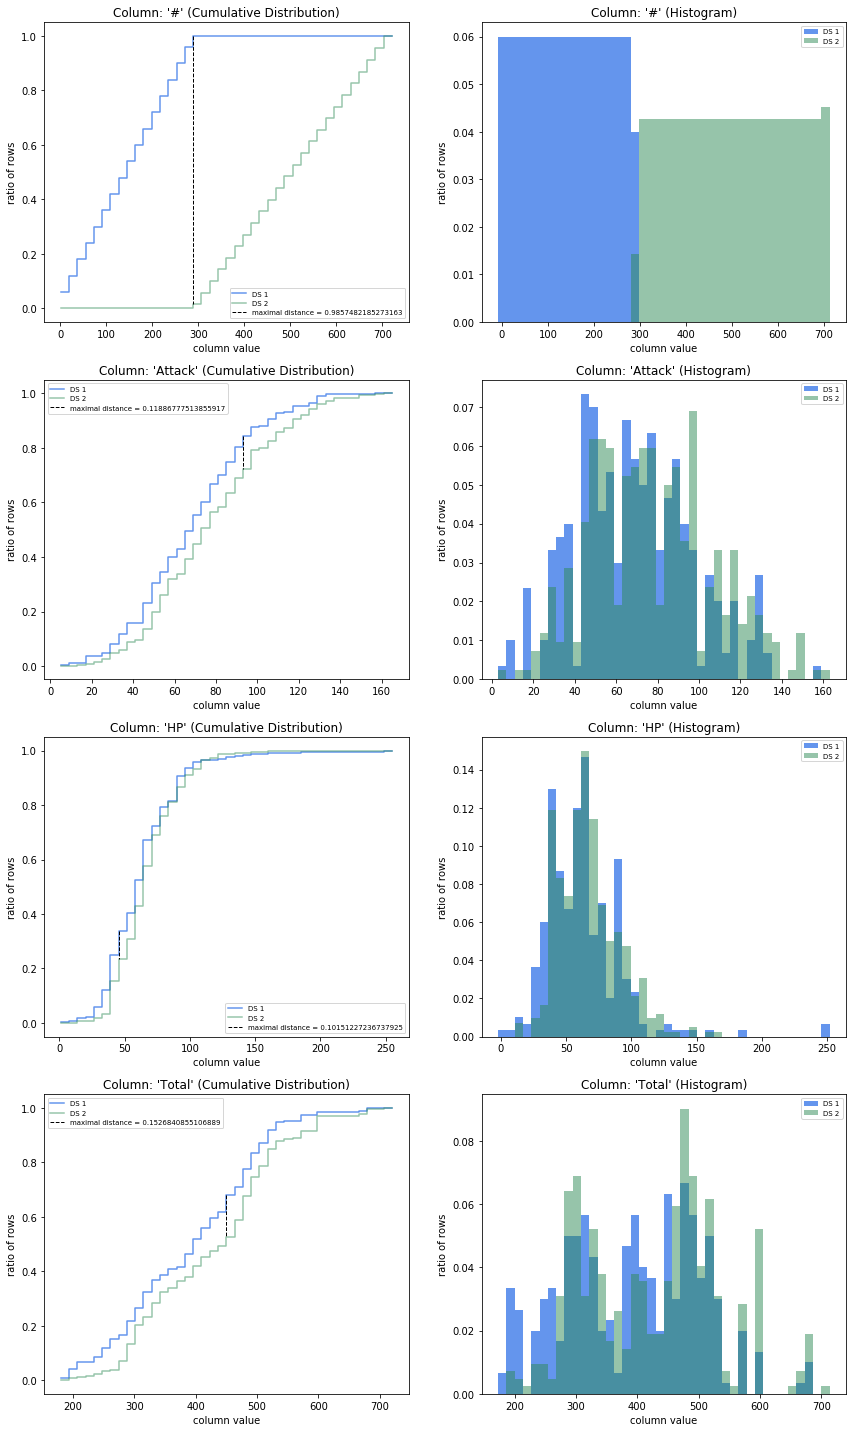

## Categorical Statistical Check

Examined Columns: ['Generation', 'Legendary', 'Type 1', 'Type 2']
Shifted Columns: ['Generation', 'Legendary', 'Type 1', 'Type 2']

Performed statistical test: Chi^2-Test with Log-Likelihood (G-Test)
Significance level: 0.01

Column 'Generation':
	p = 8.980472435185516e-162

Column 'Legendary':
	p = 0.002826906335749689

Column 'Type 1':
	p = 0.00028165291303861386

Column 'Type 2':
	p = 0.0005803229347921134


p-values of all columns:


,Legendary,Type 1,Generation,Type 2
pvalue,0.002827,0.000282,8.980472e-162,0.00058


/usr/local/lib/python3.7/site-packages/pandas/core/series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


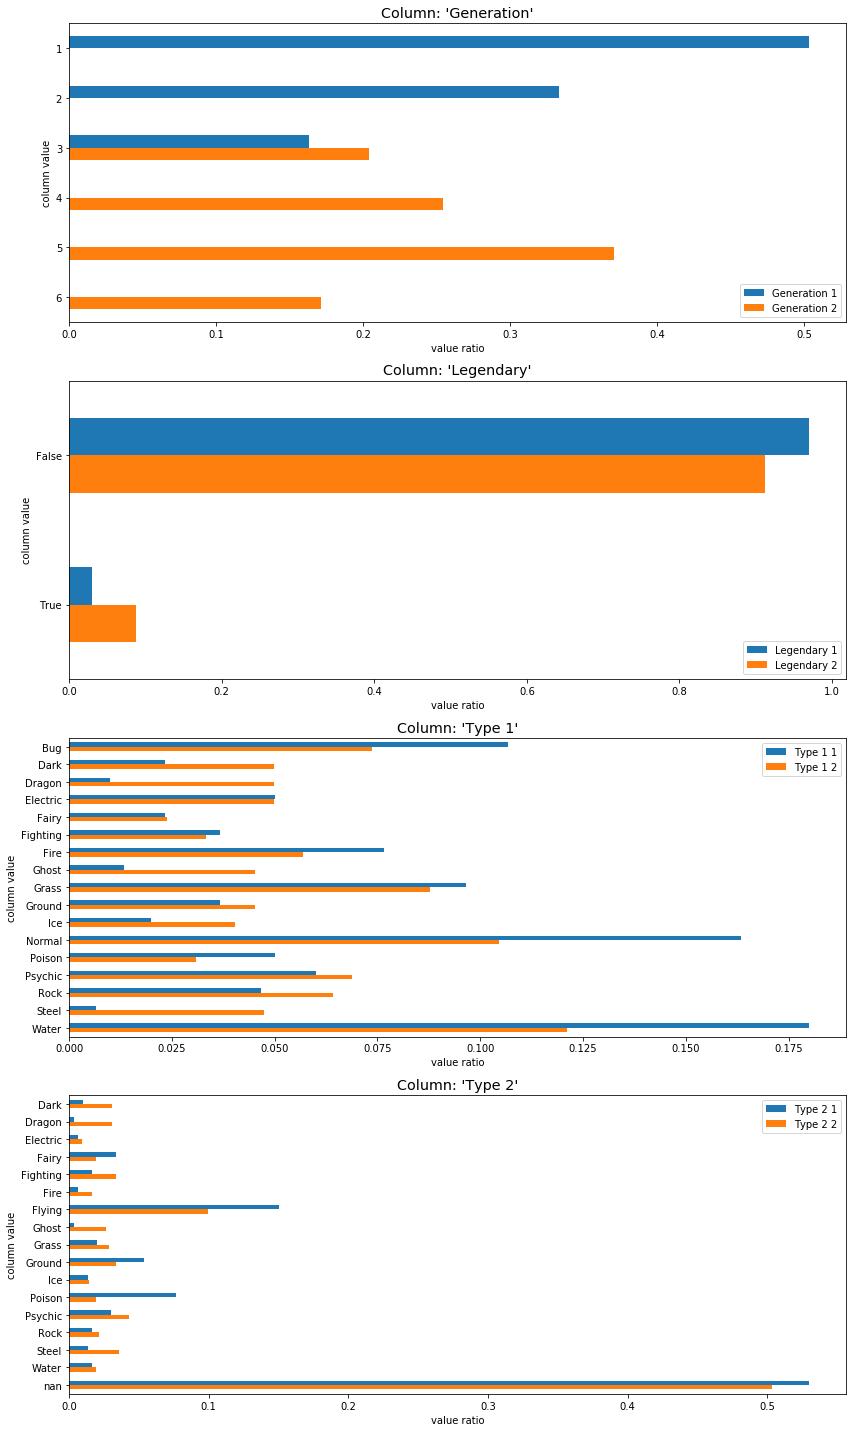

## Text Metadata Check

Examined Columns: ['Entry', 'Name']
Shifted Columns: ['Entry']

Statistical tests performed:
	- numerical metadata: Kolmogorov-Smirnov-Two-Sample-Test
	- categorical metadata: Chi^2-Test with Log-Likelihood (G-Test)
Significance level: 0.01

Some text metadata metrics on the following columns are unlikely to be equally distributed.

Column 'Entry':
	Significant metadata:
		- distinct_words
		- num_chars
		- num_words

p-values of all columns:


column            Entry                                       Name            \
metadata distinct_words     num_chars     num_words distinct_words num_chars   
pvalue         0.001538  5.428843e-29  1.041844e-26            1.0  0.705366   

column              
metadata num_words  
pvalue    0.987243

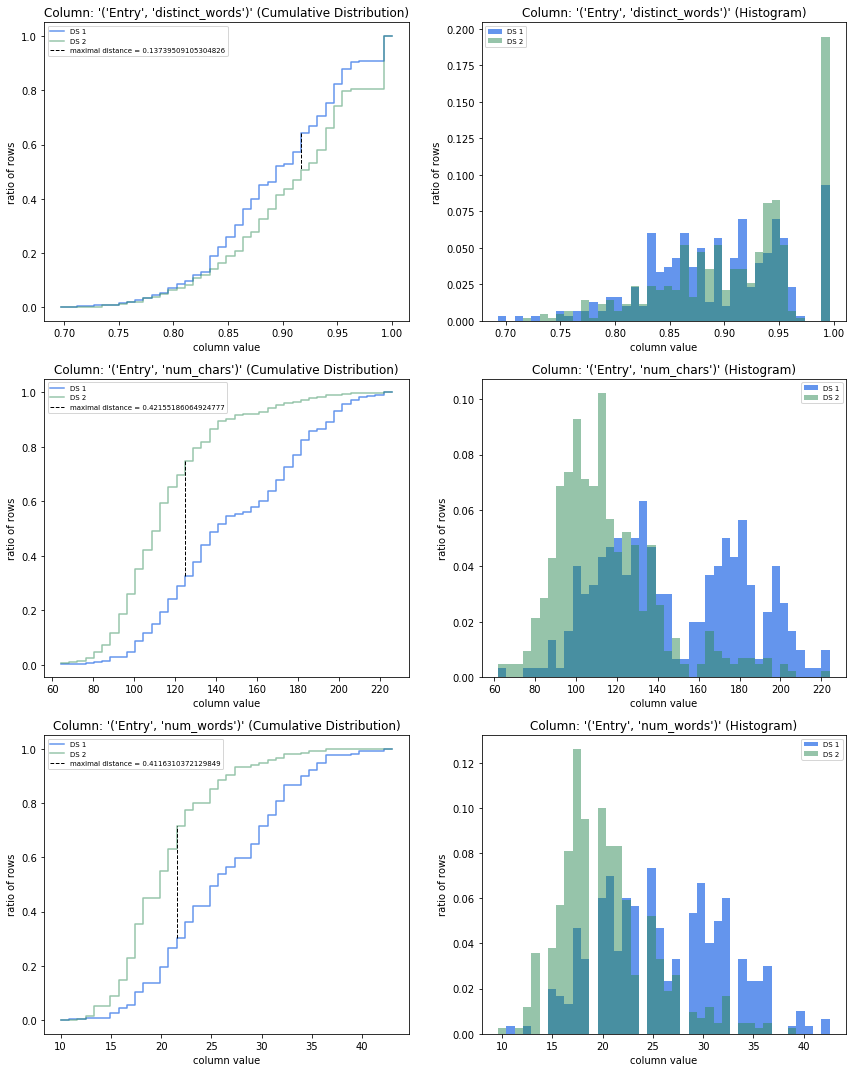

In [9]:
detector.evaluate()